## LAB - 02

In [1]:
#!pip install --upgrade numpy==1.24.3
#!pip install --upgrade pandas==2.2.0
#!pip install --upgrade scikit-learn==1.4.1.post1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aa2893\AppData\Local\Temp\ipykernel_8336\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df =  pd.read_csv('Lab1_output_insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1338 non-null   float64
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  Occupation_Artist    1338 non-null   bool   
 14  Occupation_Doctor    1338 non-null   bool   
 15  Occupation_Engineer  1338 non-null   b

In [5]:
#Question 1:
X = df.drop('charges', axis = 1)
y = df['charges']
X['age'].median()

39.0

In [6]:
#Answer: 39

In [7]:
#Question 2:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [8]:
X_scaled.head()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,Occupation_Artist,Occupation_Doctor,Occupation_Engineer,Occupation_Other,Occupation_Teacher
0,0.021739,0.0,0.321227,0.0,0.0,0.678161,0.333333,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.0,0.391041,0.2,1.0,0.678161,0.666667,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,1.0,0.458434,0.6,1.0,0.678161,1.000000,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.326087,1.0,0.181464,0.0,1.0,0.563218,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,1.0,0.632184,0.666667,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
X_scaled['age'].median()

0.4565217391304348

In [10]:
#Answer 2: 0.45

In [11]:
#Question 3:

from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=None)
current_distance_threshold = 0.0
while True:
    agglomerative_clustering.set_params(distance_threshold=current_distance_threshold)
    agglomerative_clustering.fit(X_scaled)
    unique_labels = set(agglomerative_clustering.labels_)
    if len(unique_labels) == 4:
        break
    current_distance_threshold += 0.01

current_distance_threshold

21.670000000000588

In [12]:
#Plotting the dendogram

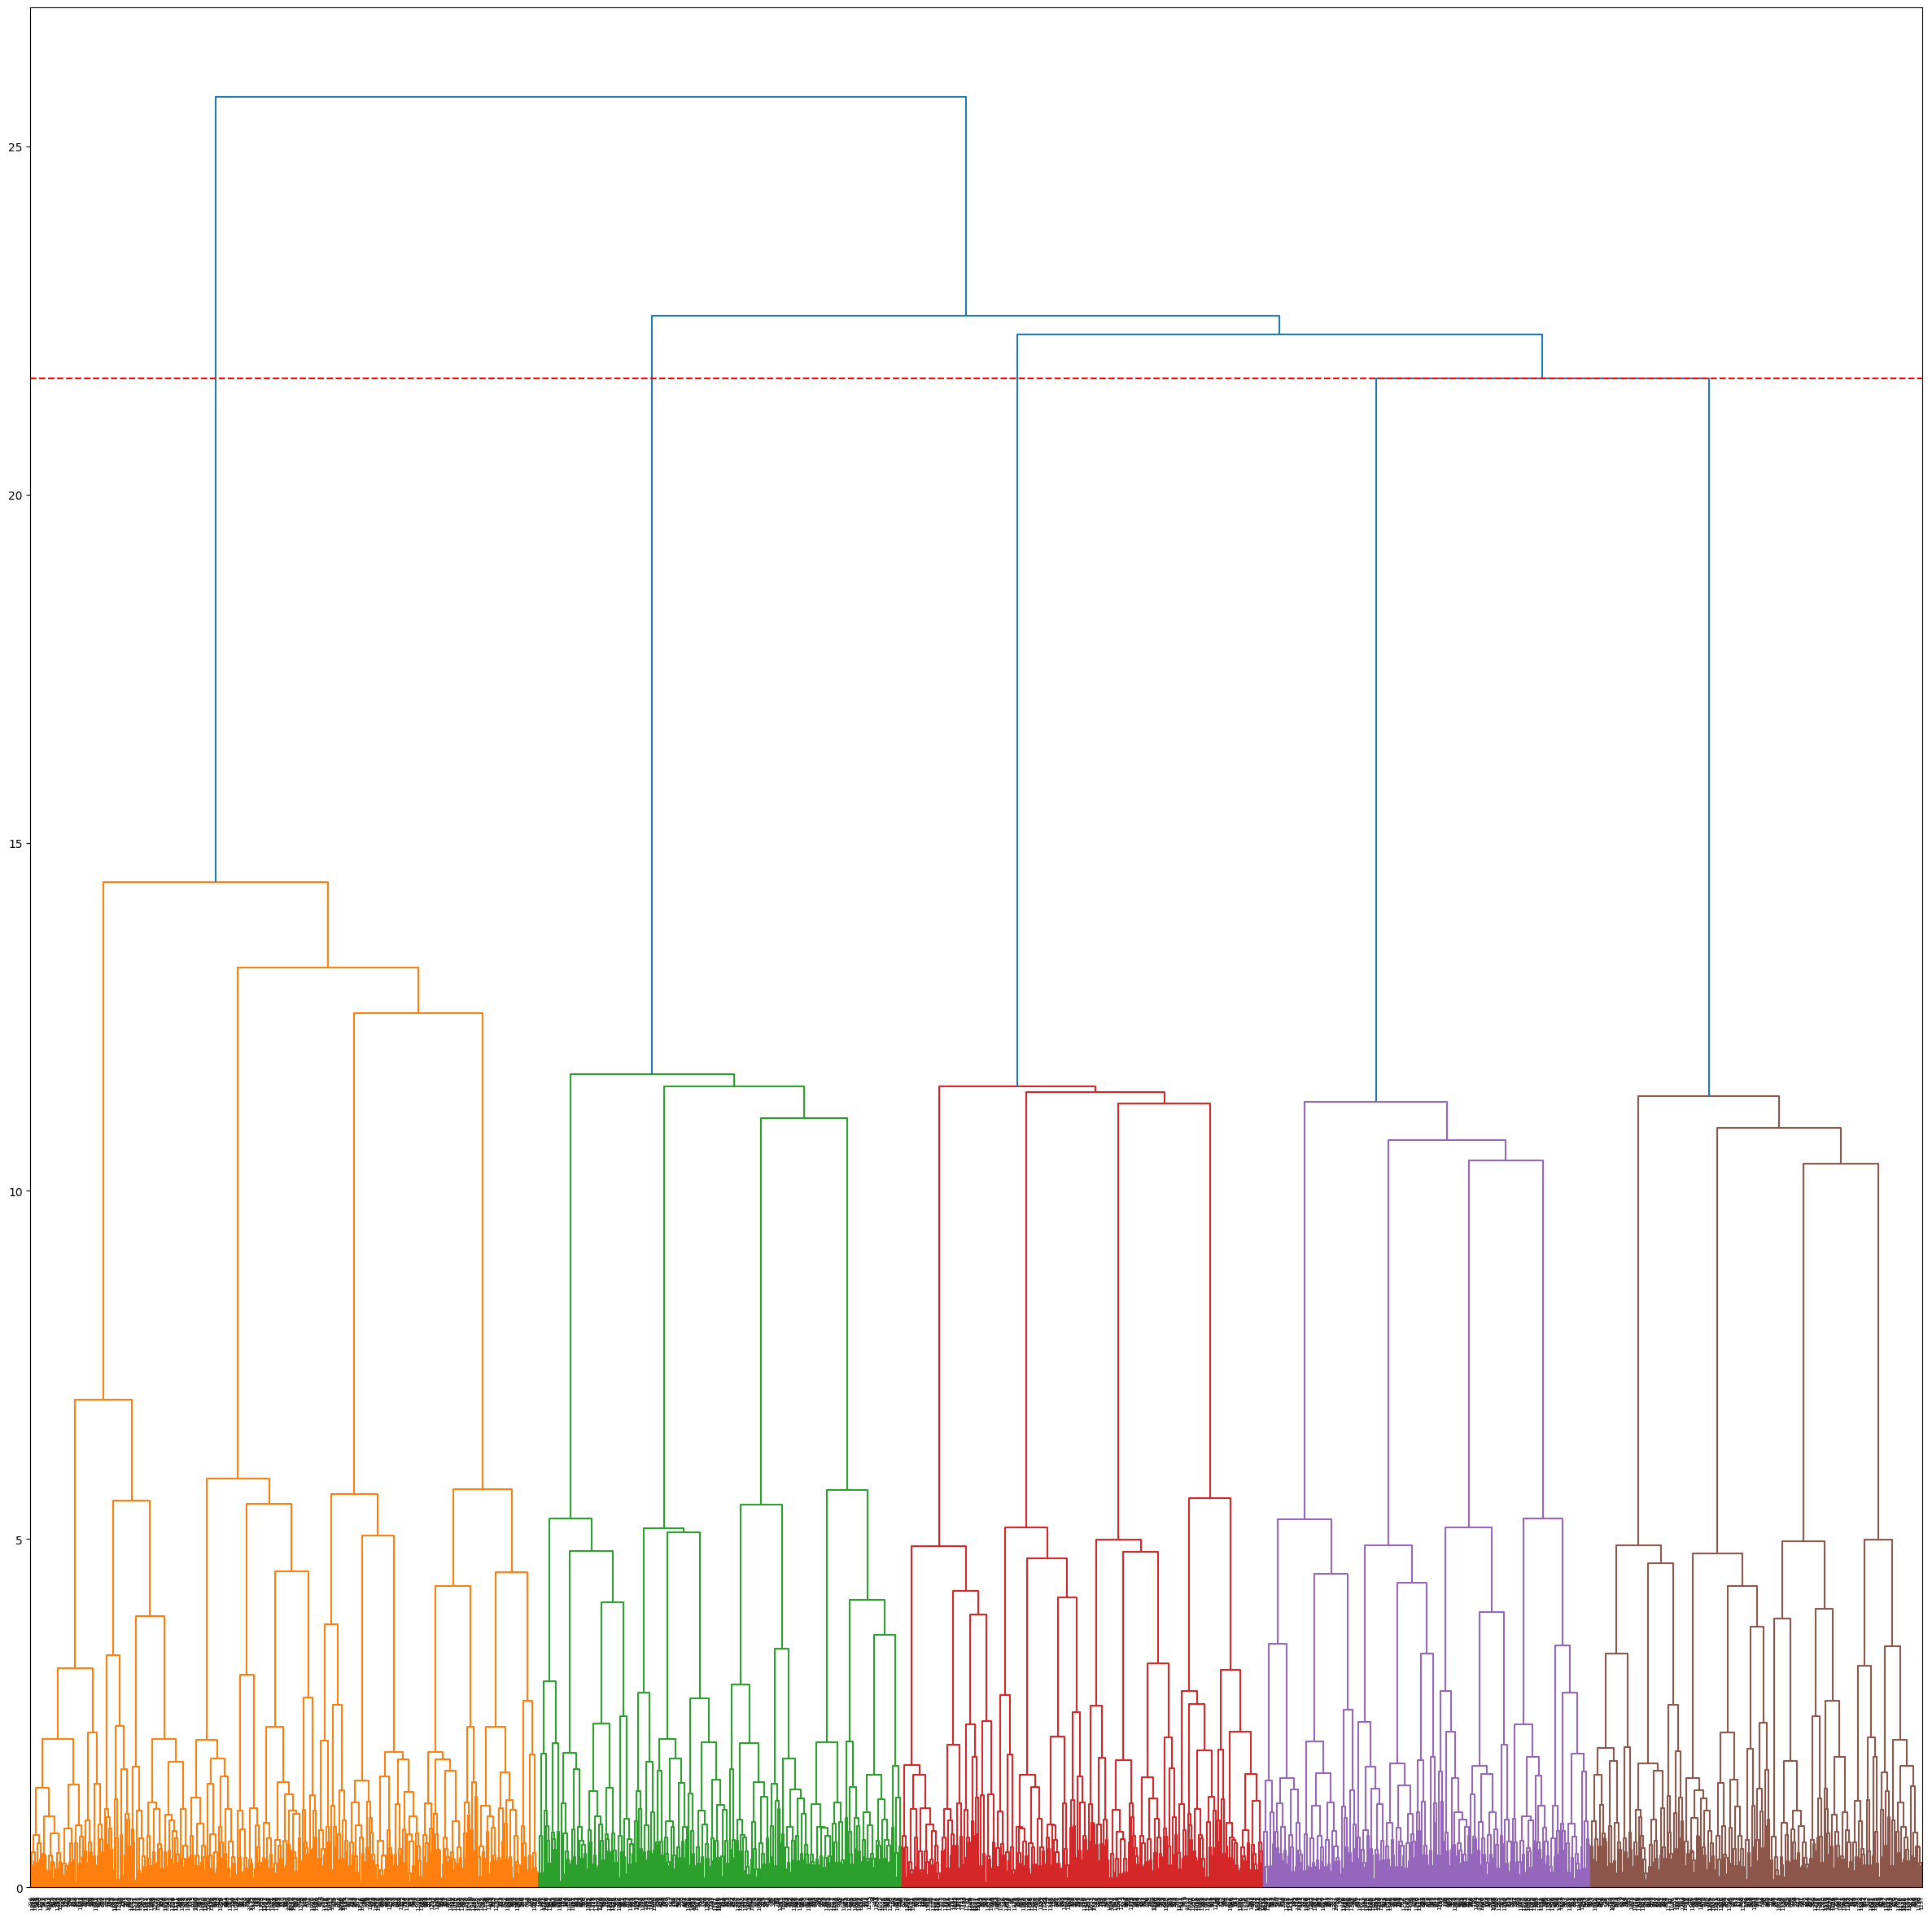

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
 
plt.subplots(figsize = (30,30))
dendrogram(linkage(X_scaled, method = 'ward'))
plt.axhline(y = 21.67, c = 'r', linestyle = '--')
plt.show()

In [14]:
#distance threshold is 21.67; Rounding to nearest whole number 22.

In [15]:
#Question 4:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold = 22, n_clusters = None, linkage = 'ward')
model = model.fit(X_scaled)

In [16]:
model.n_clusters_

4

In [17]:
model.labels_

array([1, 3, 2, ..., 3, 0, 3], dtype=int64)

In [18]:
pd.Series(model.labels_).value_counts()

0    466
1    359
2    257
3    256
Name: count, dtype: int64

In [19]:
#Question 5:
X_original = scaler.inverse_transform(X_scaled)

df_agg_cluster = pd.DataFrame(X_original, columns=X.columns[:X_original.shape[1]])  
df_agg_cluster['Cluster'] = model.labels_
df_agg_cluster.head()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,Occupation_Artist,Occupation_Doctor,Occupation_Engineer,Occupation_Other,Occupation_Teacher,Cluster
0,19.0,0.0,27.900,0.0,0.0,8900.0,1.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,18.0,1.0,30.495,1.0,1.0,8900.0,2.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,28.0,1.0,33.000,3.0,1.0,8900.0,3.0,45.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
3,33.0,1.0,22.705,0.0,1.0,7900.0,1.0,60.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
4,32.0,1.0,28.880,0.0,1.0,8500.0,2.0,60.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [20]:
df_agg_cluster.groupby('Cluster')['age'].mean().sort_values()

Cluster
3    37.714844
1    39.075209
2    39.529183
0    39.950644
Name: age, dtype: float64

In [21]:
#Answer: Order 3->1->2->0

In [22]:
#Question 6:
df_agg_cluster.groupby('Cluster')['avg_steps_per_day'].median().sort_values()

Cluster
2    7800.0
1    7900.0
0    8000.0
3    8100.0
Name: avg_steps_per_day, dtype: float64

In [23]:
#Answer: Order 2->1->0->3

In [24]:
#Question 7:
option1 = (df_agg_cluster.groupby('Cluster')['region_northeast'].mean().idxmax() == 1)
option2 = (df_agg_cluster[df_agg_cluster['Cluster'] == 1]['sex'].mean() < 0.5)
option3 = (df_agg_cluster.groupby('Cluster')['region_northeast'].mean().idxmin() == 1)
option4 = (df_agg_cluster.groupby('Cluster')['region_southeast'].mean().idxmin() == 1)
option5 = (df_agg_cluster[df_agg_cluster['Cluster'] == 1]['smoker'].mean() < 0.5)
option6 = (df_agg_cluster.groupby('Cluster')['region_southeast'].mean().idxmax() == 1)
option7 = (df_agg_cluster.groupby('Cluster')['age'].mean().idxmin() == 1)
option8 = (df_agg_cluster[df_agg_cluster['Cluster'] == 1]['Occupation_Engineer'].sum() == 0)

print(option1)
print(option2)
print(option3)
print(option4)
print(option5)
print(option6)
print(option7)
print(option8)

False
False
True
False
False
True
False
True


In [25]:
df_agg_cluster.groupby('Cluster')['age'].mean()

Cluster
0    39.950644
1    39.075209
2    39.529183
3    37.714844
Name: age, dtype: float64

In [26]:
#Question 8:
option1 = (df_agg_cluster.groupby('Cluster')['gym_frequency'].mean().idxmax() == 2) and (df_agg_cluster.groupby('Cluster')['time_spent_in_gym'].mean().idxmax() == 2)
option2 = (df_agg_cluster[(df_agg_cluster['Cluster'] == 2) & ((df_agg_cluster['Occupation_Doctor'] == 1) | (df_agg_cluster['Occupation_Teacher'] == 1))].shape[0] == len(df_agg_cluster[df_agg_cluster['Cluster'] == 2]))
option3 = (df_agg_cluster.groupby('Cluster')['age'].mean().idxmin() == 2)
option4 = (df_agg_cluster[df_agg_cluster['Cluster'] == 2]['sex'].mean() < 0.5)
option5 = (df_agg_cluster[df_agg_cluster['Cluster'] == 2]['gym_frequency'].mean() > df_agg_cluster[df_agg_cluster['Cluster'] == 2]['time_spent_in_gym'].mean())
option6 = (df_agg_cluster[df_agg_cluster['Cluster'] == 2]['Occupation_Engineer'].sum() == len(df_agg_cluster[df_agg_cluster['Cluster'] == 2]))

print(option1)
print(option2)
print(option3)
print(option4)
print(option5)
print(option6)

True
False
False
False
False
False


In [27]:
#Question 9:
option1 = (df_agg_cluster.groupby('Cluster')['smoker'].mean().idxmin() == 3)
option2 = (df_agg_cluster[df_agg_cluster['Cluster'] == 3]['Occupation_Artist'].sum() == len(df_agg_cluster[df_agg_cluster['Cluster'] == 3]))
option3 = (df_agg_cluster.groupby('Cluster')['time_spent_in_gym'].mean().idxmax() == 3)
option4 = (df_agg_cluster[df_agg_cluster['Cluster'] == 3]['region_northwest'].mean() > 0.5)

print(option1)
print(option2)
print(option3)
print(option4)

False
False
False
False


In [28]:
#Question 10:
df_agg_cluster['Cluster'][df_agg_cluster['children'] == 0].value_counts().sort_values()

Cluster
2     91
3    108
1    151
0    203
Name: count, dtype: int64

In [29]:
#Question 11:
from sklearn.cluster import KMeans

model_KMeans = KMeans(n_clusters= 4, random_state = 0, n_init= 'auto')
model_KMeans.fit(X_scaled)

C:\Users\aa2893\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aa2893\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aa2893\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aa2893\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

KMeans(n_clusters=4, random_state=0)

In [30]:
model_KMeans.labels_

array([0, 2, 1, ..., 0, 0, 3])

In [31]:
pd.Series(model_KMeans.labels_).value_counts()

2    365
1    326
3    326
0    321
Name: count, dtype: int64

In [32]:
#Answer: 0-321, 1-326, 2-365, 3-326

In [33]:
#Question 12:
X_original = scaler.inverse_transform(X_scaled)

df_kmeans_cluster = pd.DataFrame(X_original, columns=X.columns[:X_original.shape[1]])
df_kmeans_cluster['Cluster'] = model_KMeans.labels_
df_kmeans_cluster.head()

,age,sex,bmi,children,smoker,avg_steps_per_day,gym_frequency,time_spent_in_gym,region_northeast,region_northwest,region_southeast,region_southwest,Occupation_Artist,Occupation_Doctor,Occupation_Engineer,Occupation_Other,Occupation_Teacher,Cluster
0,19.0,0.0,27.900,0.0,0.0,8900.0,1.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,18.0,1.0,30.495,1.0,1.0,8900.0,2.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,28.0,1.0,33.000,3.0,1.0,8900.0,3.0,45.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,33.0,1.0,22.705,0.0,1.0,7900.0,1.0,60.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,32.0,1.0,28.880,0.0,1.0,8500.0,2.0,60.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [34]:
option1 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 0]['region_northeast'].mean() > 0.5)
option2 = (df_kmeans_cluster.groupby('Cluster')['avg_steps_per_day'].mean().idxmax() == 0)
option3 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 0]['sex'].mean() < 0.6)
option4 = (df_kmeans_cluster.groupby('Cluster')['age'].mean().idxmax() == 0)
option5 = ((df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 0]['time_spent_in_gym'] < 30).mean() > 0.5)
option6 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 0]['gym_frequency'] >= 2).mean() > 0.5
option7 = (df_kmeans_cluster.groupby('Cluster')['smoker'].mean().idxmin() == 0)

print(option1)
print(option2)
print(option3)
print(option4)
print(option5)
print(option6)
print(option7)

False
False
True
True
False
True
False


In [35]:
#Question 13:
df_kmeans_cluster['Cluster'][df_kmeans_cluster ['children'] == 1].value_counts().sort_values()

Cluster
3     77
0     78
1     82
2    100
Name: count, dtype: int64

In [36]:
#Question 14:
option1 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 1]['sex'].mean() == 1)
option2 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 1]['time_spent_in_gym'].mean() < 30)
option3 = (df_kmeans_cluster.groupby('Cluster')['age'].mean().idxmax() == 1)
option4 = (df_kmeans_cluster.groupby('Cluster')['region_northeast'].mean().idxmax() == 1)
option5 = (df_kmeans_cluster.groupby('Cluster')['bmi'].mean().idxmax() == 1)
option6 = (df_kmeans_cluster.groupby('Cluster')['region_northwest'].mean().idxmax() == 1)
option7 = (df_kmeans_cluster.groupby('Cluster')['smoker'].mean().idxmax() == 1)

print(option1)
print(option2)
print(option3)
print(option4)
print(option5)
print(option6)
print(option7)

True
False
False
False
False
True
False


In [37]:
#Question 15:
option1 = (df_kmeans_cluster.groupby('Cluster')['age'].mean().idxmin() == 2)
option2 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 2]['time_spent_in_gym'] >= 30).mean() > 0.75
option3 = (df_kmeans_cluster.groupby('Cluster')['smoker'].mean().idxmin() == 2)
option4 = (df_kmeans_cluster.groupby('Cluster')['smoker'].mean().idxmax() == 2)
option5 = (df_kmeans_cluster.groupby('Cluster')['bmi'].mean().idxmin() == 2)
option6 = (df_kmeans_cluster.groupby('Cluster')['age'].mean().idxmax() == 2)
option7 = (df_kmeans_cluster.groupby('Cluster')['bmi'].mean().idxmax() == 2)

print(option1)
print(option2)
print(option3)
print(option4)
print(option5)
print(option6)
print(option7)

False
False
True
False
False
False
True


In [38]:
df_kmeans_cluster.groupby('Cluster')['smoker'].mean()

Cluster
0    0.847352
1    0.809816
2    0.791781
3    0.837423
Name: smoker, dtype: float64

In [39]:
#Question 16:
df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 2][['Occupation_Artist', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Other', 'Occupation_Teacher']].sum()

Occupation_Artist       67.0
Occupation_Doctor       66.0
Occupation_Engineer     63.0
Occupation_Other       112.0
Occupation_Teacher      57.0
dtype: float64

In [40]:
#Question 17:
option1 = (df_kmeans_cluster.groupby('Cluster')['age'].mean().idxmax() == 3)
option2 = (df_kmeans_cluster.groupby('Cluster')['smoker'].mean().idxmax() == 3)
option3 = ((df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 3]['children'] >= 2).mean() >= 0.29) and ((df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 3]['children'] >= 2).mean() <= 0.34)
option4 = (df_kmeans_cluster.groupby('Cluster')['bmi'].mean().idxmax() == 3)
option5 = (abs(df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 3]['sex'].mean() - 0.5) <= 0.05)
option6 = (df_kmeans_cluster.groupby('Cluster')['age'].mean().idxmin() == 3)
option7 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 3]['gym_frequency'].value_counts().idxmax() == 3)
option8 = (df_kmeans_cluster.groupby('Cluster')['bmi'].mean().idxmin() == 3)
option9 = (df_kmeans_cluster[df_kmeans_cluster['Cluster'] == 3]['sex'].sum() == 0)

print(option1)
print(option2)
print(option3)
print(option4)
print(option5)
print(option6)
print(option7)
print(option8)
print(option9)

False
False
True
False
False
False
True
False
True


In [41]:
#Question 18, 19:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
high_score = max(silhouette_scores)

print(best_n_clusters)
print(high_score)

6
0.1804260785638927


In [42]:
#Answer 18: 6
#Answer 19: 0.18

In [43]:
#Question 20, 21:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, agg_clustering.labels_)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
high_sil_score = max(silhouette_scores)

print(best_n_clusters)
print(high_sil_score)

5
0.2245815841143073


In [44]:
#Answer 20: 5
#Answer 21: 0.22